In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

# Nếu bạn đã có 3 biến df_products, df_details, df_reviews thì giữ nguyên.
# Nếu không, tự động đọc từ CSV (đổi tên file nếu khác)
if 'df_products' not in globals():
    if Path('tiki_products_7000.csv').exists():
        df_products = pd.read_csv('tiki_products_7000.csv')
    else:
        df_products = pd.read_csv('tiki_products.csv')

if 'df_details' not in globals():
    if Path('tiki_details_7000.csv').exists():
        df_details = pd.read_csv('tiki_details_7000.csv')
    else:
        df_details = pd.read_csv('tiki_details.csv')

if 'df_reviews' not in globals():
    if Path('tiki_reviews_sample.csv').exists():
        df_reviews = pd.read_csv('tiki_reviews_sample.csv')
    else:
        df_reviews = pd.read_csv('tiki_reviews.csv')

print("Shapes:", df_products.shape, df_details.shape, df_reviews.shape)


Shapes: (1842, 8) (1842, 5) (7270, 7)


In [4]:
df_products

,id,name,price,rating,review_count,brand,seller,url
0,2123245,Sữa Rửa Mặt Mịn Và Săn Chắc Da Senka Perfect W...,100000,4.6,56,Senka,NaN,https://tiki.vn/sua-rua-mat-min-va-san-chac-da...
1,117147637,"Sữa rửa mặt Simple giúp cấp ẩm, da trông khỏe ...",109000,4.7,227,SIMPLE,NaN,https://tiki.vn/sua-rua-mat-simple-giup-cap-am...
2,275798162,Sữa rửa mặt làm sáng da Hatomugi 170g/tuýp,59000,0.0,0,Reihaku Hatomugi,NaN,https://tiki.vn/sua-rua-mat-lam-sang-da-hatomu...
3,275798192,"Combo 2 Sữa rửa mặt ngừa mụn, dưỡng ẩm và làm ...",172960,0.0,0,Reihaku Hatomugi,NaN,https://tiki.vn/sua-rua-mat-ngua-mun-duong-am-...
4,276112759,Sữa rửa mặt PERFECT DIARY axit amin tạo bọt dị...,201480,0.0,0,PERFECT DIARY,NaN,https://tiki.vn/sua-rua-mat-perfect-diary-axit...
...,...,...,...,...,...,...,...,...
1837,103378680,VÒI RỬA BÁT KB 509,576000,0.0,0,GROVES,NaN,https://tiki.vn/voi-rua-bat-kb-509-p103378680....
1838,103378445,VÒI RỬA CHÉN KB 807,1270000,0.0,0,GROVES,NaN,https://tiki.vn/voi-rua-chen-kb-807-p103378445...
1839,103378432,VÒI RỬA BÁT KB 806,1170000,0.0,0,GROVES,NaN,https://tiki.vn/voi-rua-bat-kb-806-p103378432....
1840,103378455,VÒI RỬA BÁT KB 501,810000,0.0,0,GROVES,NaN,https://tiki.vn/voi-rua-bat-kb-501-p103378455....


In [5]:
df_details

,id,brand,seller,categories,short_description
0,2123245,Senka,Tiki Trading,Sữa rửa mặt,Sữa rửa mặt Senka hồng Perfect Whip Collagen I...
1,117147637,SIMPLE,Tiki Trading,Làm Đẹp - Sức Khỏe,Thương hiệu sữa rửa mặt SimpleSimple là thương...
2,275798162,Reihaku Hatomugi,Tiki Trading,Sữa rửa mặt,Thành phầnSữa rửa mặt làm sáng da Hatomugi - T...
3,275798192,Reihaku Hatomugi,Tiki Trading,Sữa rửa mặt,"Thành phầnSữa rửa mặt ngừa mụn, dưỡng ẩm và là..."
4,276112759,PERFECT DIARY,Tiki Trading,Sữa rửa mặt,"Hướng dẫn sử dụng '1. Xoay nắp trên , lắp đầu ..."
...,...,...,...,...,...
1837,103378680,GROVES,Thiết bị vệ sinh Ngọc Tú,Nhà Cửa - Đời Sống,VÒI RỬA BÁT KB 509 Hãng sản xuất :Kob...
1838,103378445,GROVES,Thiết bị vệ sinh Ngọc Tú,Vòi rửa chén bát,Thương hiệu: GROVESMã sản phẩm: GRB 807Mô tả:V...
1839,103378432,GROVES,Thiết bị vệ sinh Ngọc Tú,Vòi rửa chén bát,VÒI RỬA BÁT NÓNG LẠNH GRB806- Thiết kế sang tr...
1840,103378455,GROVES,Thiết bị vệ sinh Ngọc Tú,Vòi rửa chén bát,VÒI RỬA BÁT NÓNG LẠNH GRB806- Thiết kế sang tr...


== PRODUCTS: overview ==
          id                                               name   price  \
0    2123245  Sữa Rửa Mặt Mịn Và Săn Chắc Da Senka Perfect W...  100000   
1  117147637  Sữa rửa mặt Simple giúp cấp ẩm, da trông khỏe ...  109000   
2  275798162         Sữa rửa mặt làm sáng da Hatomugi 170g/tuýp   59000   

   rating  review_count             brand  seller  \
0     4.6            56             Senka     NaN   
1     4.7           227            SIMPLE     NaN   
2     0.0             0  Reihaku Hatomugi     NaN   

                                                 url  
0  https://tiki.vn/sua-rua-mat-min-va-san-chac-da...  
1  https://tiki.vn/sua-rua-mat-simple-giup-cap-am...  
2  https://tiki.vn/sua-rua-mat-lam-sang-da-hatomu...  
               count          mean           std       min          25%  \
id            1842.0  1.748138e+08  9.559981e+07  380290.0  97707204.75   
price         1842.0  4.868653e+05  1.127923e+06    4900.0    100000.00   
rating        18

seller          100.0
brand             1.3
id                0.0
name              0.0
price             0.0
rating            0.0
review_count      0.0
url               0.0
Name: %missing, dtype: float64


Duplicated id rate: 0.00%


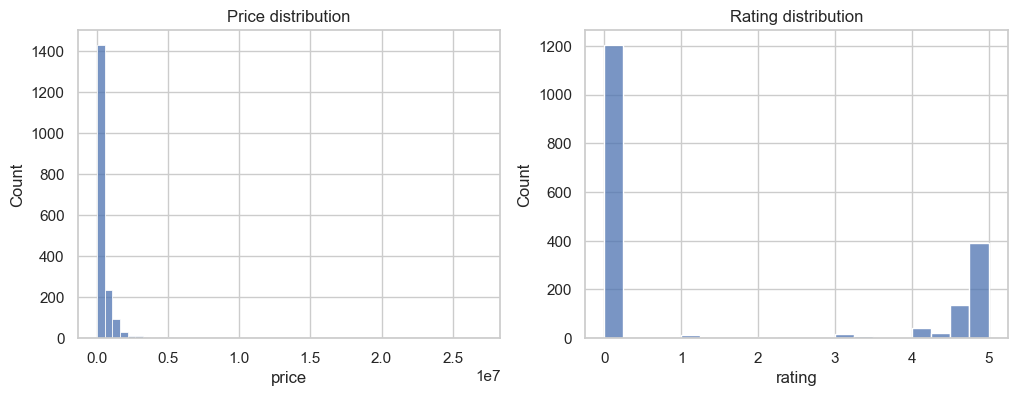

,count
brand,
Finish,187
OEM,98
GROVES,71
The Cocoon Original Vietnam,58
Dabo,40
Cetaphil,33
EUROVINTO,27
Wonmom,25
dermalogica,23


,count
seller,



🧪 Kết luận nhanh cho CBF/Hybrid:
- Cần name/description/specs càng đầy đủ càng tốt (sẽ check ở phần details).
- Price/rating có outlier? Nếu có đuôi dài, cân nhắc winsorize/log-scale khi train.
- Brand/Seller phủ bao nhiêu %? Nếu thấp <50% thì coi như optional feature.


In [3]:
def pct_missing(df):
    miss = df.isna().mean().sort_values(ascending=False)
    return (miss*100).round(2).rename('%missing')

print("== PRODUCTS: overview ==")
print(df_products.head(3))
print(df_products.select_dtypes(include=[np.number]).describe().T)

# kiểm tra cột quan trọng
key_cols = ["id","name","price","rating","review_count","brand","seller","url"]
print("\n% missing (products):")
display(pct_missing(df_products[key_cols]))

# trùng id?
dup_rate = 100*df_products.duplicated("id").mean()
print(f"\nDuplicated id rate: {dup_rate:.2f}%")

# phân phối giá & rating
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_products['price'].dropna(), bins=50, ax=ax[0]); ax[0].set_title("Price distribution")
sns.histplot(df_products['rating'].dropna(), bins=20, ax=ax[1]); ax[1].set_title("Rating distribution")
plt.show()

# top brand / seller
top_brand = df_products['brand'].value_counts().head(10)
top_seller = df_products['seller'].value_counts().head(10)
display(top_brand.to_frame('count'), top_seller.to_frame('count'))

print("\n🧪 Kết luận nhanh cho CBF/Hybrid:")
print("- Cần name/description/specs càng đầy đủ càng tốt (sẽ check ở phần details).")
print("- Price/rating có outlier? Nếu có đuôi dài, cân nhắc winsorize/log-scale khi train.")
print("- Brand/Seller phủ bao nhiêu %? Nếu thấp <50% thì coi như optional feature.")


In [9]:
print("Products:", df_products.shape)
print("Details:", df_details.shape)

Products: (1842, 8)
Details: (1842, 5)


In [10]:
df_details_subset = df_details[["id", "seller"]]

In [11]:
df_merged = df_products.merge(df_details_subset, on="id", how="left", suffixes=("", "_detail"))

In [12]:
df_merged["seller"] = df_merged["seller"].fillna(df_merged["seller_detail"])
df_merged.drop(columns=["seller_detail"], inplace=True)

In [13]:

print("Merged:", df_merged.shape)
print(df_merged.head())

Merged: (1842, 8)
          id                                               name   price  \
0    2123245  Sữa Rửa Mặt Mịn Và Săn Chắc Da Senka Perfect W...  100000   
1  117147637  Sữa rửa mặt Simple giúp cấp ẩm, da trông khỏe ...  109000   
2  275798162         Sữa rửa mặt làm sáng da Hatomugi 170g/tuýp   59000   
3  275798192  Combo 2 Sữa rửa mặt ngừa mụn, dưỡng ẩm và làm ...  172960   
4  276112759  Sữa rửa mặt PERFECT DIARY axit amin tạo bọt dị...  201480   

   rating  review_count             brand        seller  \
0     4.6            56             Senka  Tiki Trading   
1     4.7           227            SIMPLE  Tiki Trading   
2     0.0             0  Reihaku Hatomugi  Tiki Trading   
3     0.0             0  Reihaku Hatomugi  Tiki Trading   
4     0.0             0     PERFECT DIARY  Tiki Trading   

                                                 url  
0  https://tiki.vn/sua-rua-mat-min-va-san-chac-da...  
1  https://tiki.vn/sua-rua-mat-simple-giup-cap-am...  
2  https://

In [14]:
df_merged.to_csv("tiki_products_7000_merged.csv", index=False, encoding="utf-8-sig")
print("Đã lưu tiki_products_7000_merged.csv")

Đã lưu tiki_products_7000_merged.csv
